# Data Project - Stock Market Analysis

In [45]:
import numpy as  np
import pandas as pd
from pandas import Series, DataFrame

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') #whitegrid background in all visualization
%matplotlib inline

In [58]:
from pandas_datareader import DataReader

In [59]:
from datetime import datetime

In [60]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [61]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [62]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [63]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,160.122749,155.879243,157.928207,158.081554,9.096708e+07,157.533152
std,12.713261,12.926639,12.892462,12.822542,2.624464e+07,12.613116
min,132.389999,129.039993,130.070007,130.059998,3.519590e+07,129.664490
25%,149.724998,145.135002,147.135002,147.985001,7.340550e+07,147.760033
50%,161.000000,155.800003,158.979996,157.960007,8.654860e+07,157.698410
75%,171.065002,167.300003,169.385002,169.060005,1.026748e+08,168.490730
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,180.959732


In [64]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-29 to 2022-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

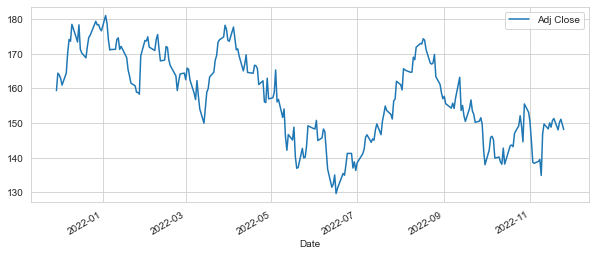

In [65]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

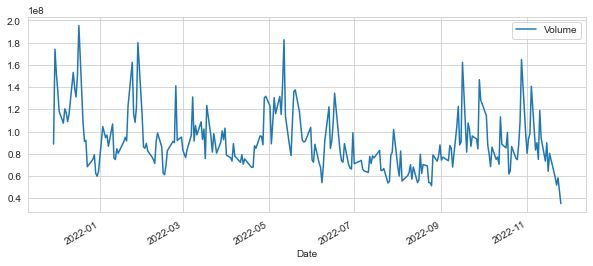

In [66]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

Daily Return Analysis

<AxesSubplot:xlabel='Date'>

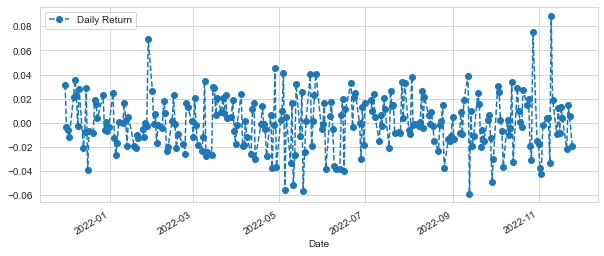

In [71]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

C:\Users\Ale Nardone\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

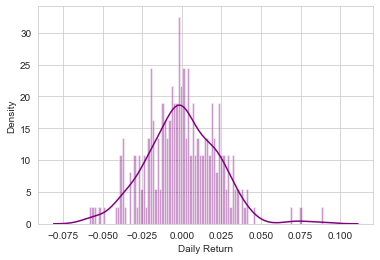

In [73]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

<AxesSubplot:>

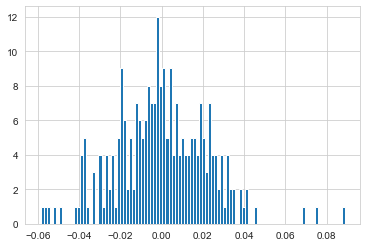

In [74]:
AAPL['Daily Return'].hist(bins=100)

In [75]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [80]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-11-29,159.315384,146.113998,333.505035,178.078506
2021-11-30,164.346176,142.451996,327.521088,175.353500
2021-12-01,163.819229,141.617996,327.015808,172.186005
2021-12-02,162.815063,143.776505,326.431305,171.867996
2021-12-03,160.906143,142.520493,320.011475,169.489502


In [81]:
tech_rets = closing_df.pct_change()

In [82]:
tech_rets.head().dropna()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-11-30,0.031578,-0.025063,-0.017943,-0.015302
2021-12-01,-0.003206,-0.005855,-0.001543,-0.018063
2021-12-02,-0.006130,0.015242,-0.001787,-0.001847
2021-12-03,-0.011724,-0.008736,-0.019667,-0.013839


C:\Users\Ale Nardone\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


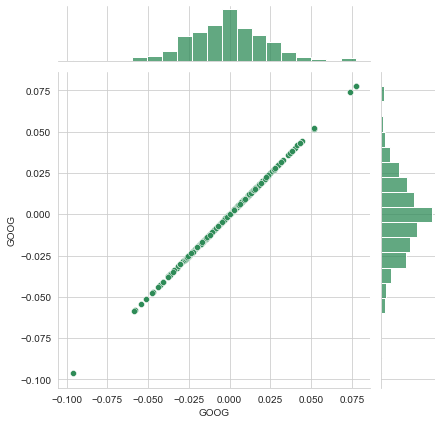

In [84]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'scatter', color='seagreen')

C:\Users\Ale Nardone\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


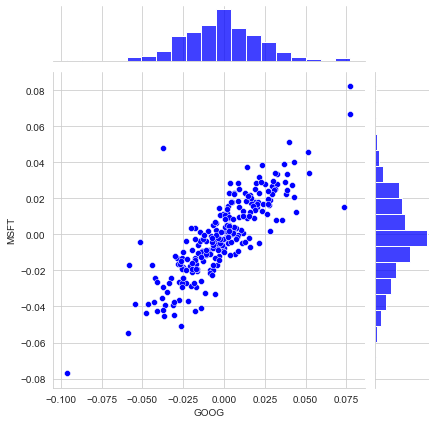

In [87]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind = 'scatter', color='blue')

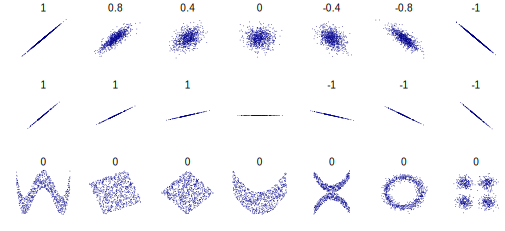

In [88]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

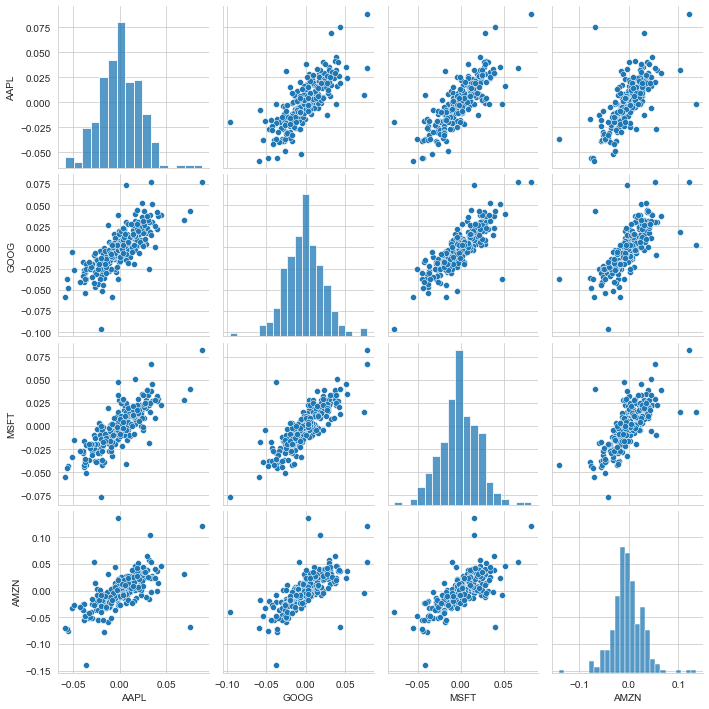

In [89]:
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

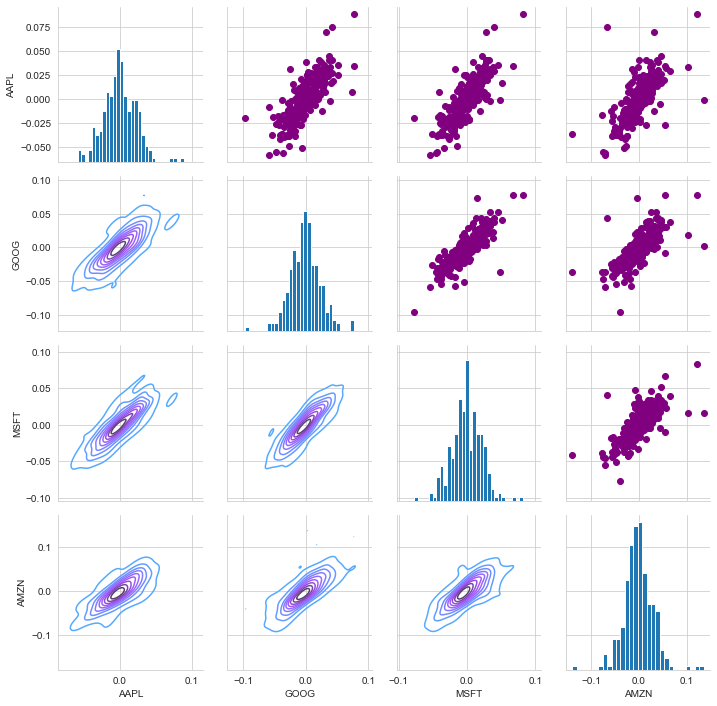

In [90]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

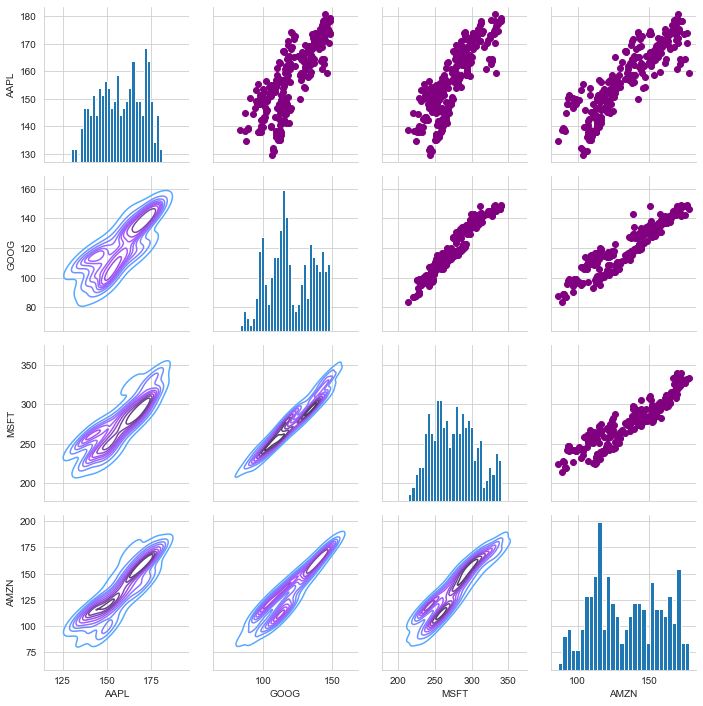

In [92]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

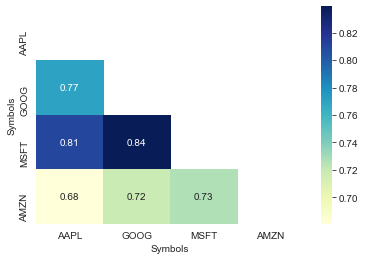

In [100]:
mask = np.triu(tech_rets.dropna().corr())
sns.heatmap(tech_rets.dropna().corr(),cmap="YlGnBu", annot=True, mask=mask)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

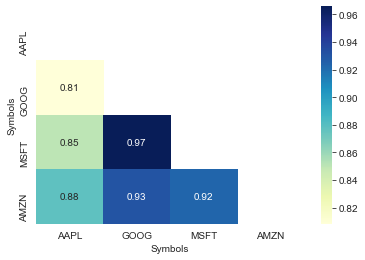

In [98]:
mask = np.triu(closing_df.dropna().corr())
sns.heatmap(closing_df.dropna().corr(),cmap="YlGnBu", annot=True, mask=mask)

Risk Analysis

In [101]:
rets = tech_rets.dropna()

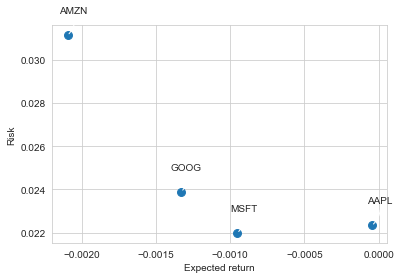

In [104]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

Value at Risk

Is the amount of money we could expect to lose for a given confidence interval.

Value at risk using the "bootstrap" method

C:\Users\Ale Nardone\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

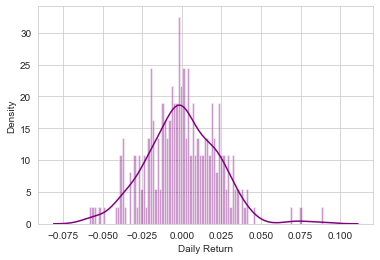

In [105]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [106]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-11-30,0.031578,-0.025063,-0.017943,-0.015302
2021-12-01,-0.003206,-0.005855,-0.001543,-0.018063
2021-12-02,-0.006130,0.015242,-0.001787,-0.001847
2021-12-03,-0.011724,-0.008736,-0.019667,-0.013839
2021-12-06,0.021503,0.008953,0.009845,0.011086


In [107]:
rets['AAPL'].quantile(0.05)

-0.0373176722628263

The 0.05 empirical quantile of daily returns is at -0.037. That means that with 95% confidence, our worst daily loss will not exceed 3.7%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.037 * 1,000,000 = $37,000.

In [109]:
rets['GOOG'].quantile(0.05)

-0.03779630368763155

In [110]:
rets['AMZN'].quantile(0.05)

-0.051805405564058396

In [111]:
rets['MSFT'].quantile(0.05)

-0.03849744165144979

If we have a 1 million dollar investment, our one-day 5%:

GOOG: VaR is 0.038 * 1,000,000 = $38,000.

AMZN: VaR is 0.052 * 1,000,000 = $52,000.

MSFT: VaR is 0.038 * 1,000,000 = $38,000.

Value at risk using the Monte Carlo method

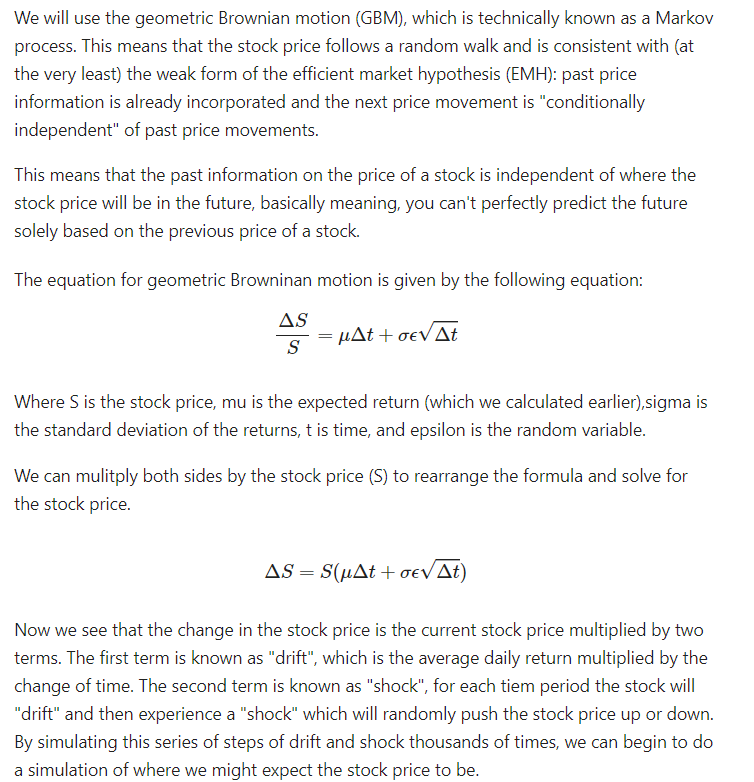

In [128]:
days = 365

dt = 1/days

mu = rets.mean()['AMZN']

sigma = rets.std()['AMZN']

In [134]:
def stock_monte_carlo(star_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [135]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-29,179.800003,176.574997,177.382004,178.078506,65312000.0,178.078506
2021-11-30,179.288498,174.600494,178.175003,175.353500,80022000.0,175.353500
2021-12-01,177.994003,172.080002,177.250000,172.186005,74916000.0,172.186005
2021-12-02,174.634995,171.187500,173.000000,171.867996,64726000.0,171.867996
2021-12-03,173.493500,166.929993,172.750000,169.489502,80712000.0,169.489502


Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

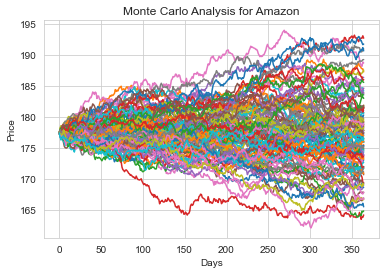

In [136]:
start_price = 177.38

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Amazon')

In [137]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Amazon Stock after 365 days')

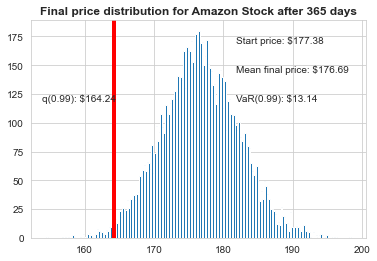

In [138]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Amazon Stock after %s days" % days, weight='bold')